# ¿Como trabajar con multiples archivos en línea usando python?

En este tutorial vamos a continuar trabajando con una de las librerías con las que hicimos la descarga de datos (*s3fs*).
A diferencia del anterior ejemplo que trabajamos, en este vamos a trabajar con todos los miembros del ensamble y vamos a calcular una media del ensamble y también la desviación estándar de dicho ensamble para un plazo de pronóstico. </br>

Esta opción podría ser util a la hora de analizar la 

Además de la librería para conectar con AWS, vamos a necesitar para este tutorial tener instalado las siguientes librerías:</br>

**netCDF4** : https://pypi.org/project/netCDF4/ </br>
**numpy** : https://pypi.org/project/numpy/ </br>
**matplotlib** : https://pypi.org/project/matplotlib/ </br>
**cartopy** : https://pypi.org/project/Cartopy/ </br>

Recordar la estructura de datos de la base en el siguiente [link](https://fmcarrasco.github.io/documentation_crc_sas/SISSA_database/2Estructura_de_datos/)

In [6]:
# Comenzamos importando las librerias

# esta linea es para el notebook muestre la figura online.
%matplotlib inline  

import s3fs
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# DATOS

BUCKET_NAME = 'sissa-forecast-database'
tforecast = 'subseasonal'
modelo = 'GEFSv12_corr'
variable = 'tmean'
year = '2010'
ymd = '20100331'
nens = 'p03'
narchivo = variable + '_' + ymd + '_' + nens + '.nc'
PATH = tforecast + '/' + modelo + '/' + variable + '/' + year + '/' + ymd + '/'

En este caso, además de la opción de *abrir* o *conectar* con un archivo, la librería **s3fs**, permite *listar* el contenido de un bucket de AWS en una lista de python. </br>

De esta forma al igual que como hicimos con UN solo archivo, en este ejemplo vamos a ir leyendo cada variable y guardando el dato de cada miembro de ensamble para un plazo de pronóstico válido.

In [7]:
# Cargamos los paises y estados/provincias
countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none')
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')

In [8]:
# Comenzamos con la conexión con el archivo

# Vamos a trabajar con el plazo de pronóstico al día 10
plazo_pron = 10

fs = s3fs.S3FileSystem(anon=True)
# Listamos todos los archivos dentro del bucket + PATH
awsfiles = fs.ls('s3://' + BUCKET_NAME + '/' + PATH)
nfile = len(awsfiles)
print('Trabajamos con los archivos:')
print(awsfiles)
print('Cantidad de archivos =', nfile)

Trabajamos con los archivos:
['sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_c00.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p01.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p02.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p03.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p04.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p05.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p06.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p07.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p08.nc', 'sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p09.nc', 'sissa-forecast-database/subse

En el siguiente recuadro de texto, vamos a ir trabajando en cada archivo, extrayendo el plazo asignado y finalmente calculamos las variables que necesitamos: media y desviación estándar: 

In [9]:
# Cargamos el dato a una variable en python

for i, awsfile in enumerate(awsfiles):
    print('Extrayendo datos del archivo:')
    print(awsfile)
    with fs.open(awsfile) as f:
        with netCDF4.Dataset(narchivo, memory=f.read()) as gefs:
             var = gefs[variable][:]
             lat = gefs['lat'][:]
             lon = gefs['lon'][:]
             if i == 0:
                 # Creamos una variable con NaN del tamaño de los archivos
                 gvar = np.empty((nfile, len(lat), len(lon)))
                 gvar[:] = np.nan
             # Guardamos el valor de temperatura para el 2 día de pronostico
             gvar[i,:,:] = var[plazo_pron,:,:]
# Comenzamos la figura
mean = np.mean(gvar, axis=0)
std = np.std(gvar, axis=0)

print('Imprimimos en pantalla el shape de cada matriz')
print(mean.shape)
print(std.shape)

Extrayendo datos del archivo:
sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_c00.nc
Extrayendo datos del archivo:
sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p01.nc
Extrayendo datos del archivo:
sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p02.nc
Extrayendo datos del archivo:
sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p03.nc
Extrayendo datos del archivo:
sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p04.nc
Extrayendo datos del archivo:
sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p05.nc
Extrayendo datos del archivo:
sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p06.nc
Extrayendo datos del archivo:
sissa-forecast-database/subseasonal/GEFSv12_corr/tmean/2010/20100331/tmean_20100331_p07.nc
Extrayendo datos del archivo:
si

Ahora que ya tenemos calculada la media y la desviación estándar, vamos a generar una figura con dichos calculos. </br>

En este caso, va a ser un mapa uno al lado del otro.

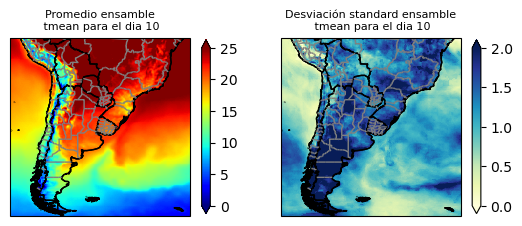

In [11]:
# Generamos una figura con dos axis en la zona de columnas
# La media y la desviación estándar van a tener distintos colores
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})

# Líneas de codigo para la figura de la Media
cs = ax[0].pcolormesh(lon, lat, mean, transform=ccrs.PlateCarree(), vmin=0, vmax=25, cmap='jet')
ax[0].coastlines()
ax[0].add_feature(countries, edgecolor='black')
ax[0].add_feature(states_provinces, edgecolor='gray')
cb = fig.colorbar(cs, ax=ax[0], shrink=0.47, extend='both')
ax[0].set_title('Promedio ensamble\n tmean para el dia ' + str(plazo_pron), fontsize=8)

# Líneas de codigo para la figura de la Desviacion estándar
cs1 = ax[1].pcolormesh(lon, lat, std, transform=ccrs.PlateCarree(), vmin=0, vmax=2, cmap='YlGnBu')
ax[1].coastlines()
ax[1].add_feature(countries, edgecolor='black')
ax[1].add_feature(states_provinces, edgecolor='gray')
cb1 = fig.colorbar(cs1, ax=ax[1], shrink=0.47, extend='both')
ax[1].set_title(u'Desviación standard ensamble\n tmean para el dia ' + str(plazo_pron), fontsize=8)

# Guardamos la figura
plt.savefig('test_media_ensamble.jpg', dpi=100, bbox_inches='tight')